## Data Deployment Draft

In [28]:
# import libraries
import pandas as pd

In [29]:
# load the data
data = pd.read_csv('data/processed_data.csv')

# preview the data
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,39,0,3,0.318958,2,3,1,5,2,1,...,3,2,1,7,3,2,16,11,0,9
1,29,0,2,0.845930,1,21,3,3,2,1,...,3,3,1,8,3,2,2,5,3,5
2,40,0,2,0.153782,2,1,1,5,2,1,...,3,1,1,24,2,2,0,0,0,0
3,24,0,2,0.785534,1,6,3,1,4,2,...,3,3,1,4,0,2,7,8,0,6
4,44,0,2,1.000000,1,5,5,5,1,1,...,3,4,1,0,2,3,0,5,1,2


In [30]:
# train a random forest model
from sklearn.ensemble import RandomForestClassifier

# the target is the Attrition
y = data['Attrition']
x = data.drop(['Attrition'], axis=1)

# train test split
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)


# train the model
model = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42)
model.fit(x_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=200, random_state=42)

In [31]:
# test the model
y_pred = model.predict(x_test)

# evaluate the model
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# confusion matrix
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Confusion matrix: \n{conf_matrix}')

Accuracy: 0.73
Confusion matrix: 
[[35 13]
 [14 38]]


In [32]:
# save the model as pkl
import joblib
joblib.dump(model, 'model/model.pkl')

['model/model.pkl']

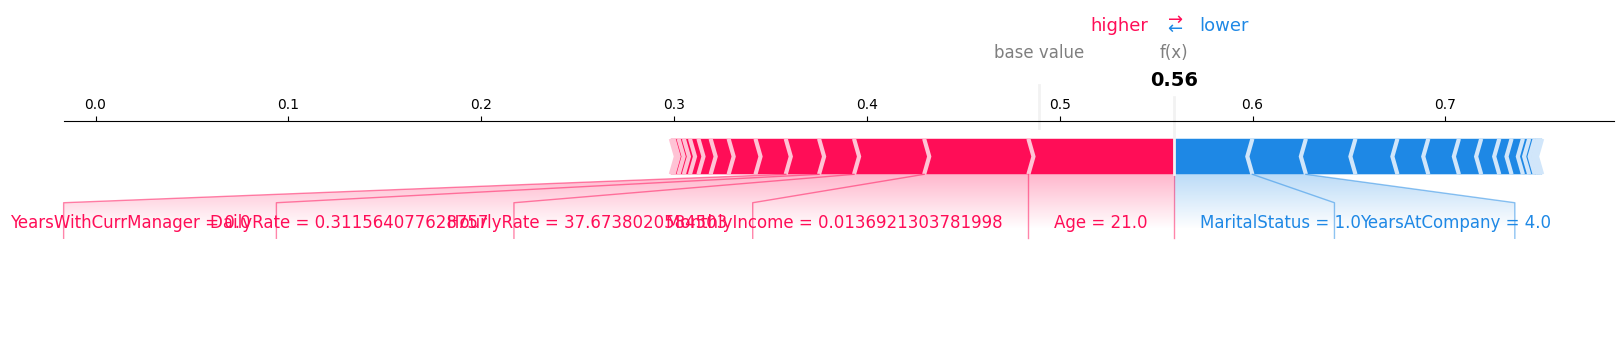

In [33]:
# use SHAP to visualize how the model works
import shap

explainer = shap.TreeExplainer(model)

# show the force plot for the first row
shap_values = explainer.shap_values(x_test.iloc[0])

shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], x_test.iloc[0], matplotlib=True)
